In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
print(df)

       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0           none    

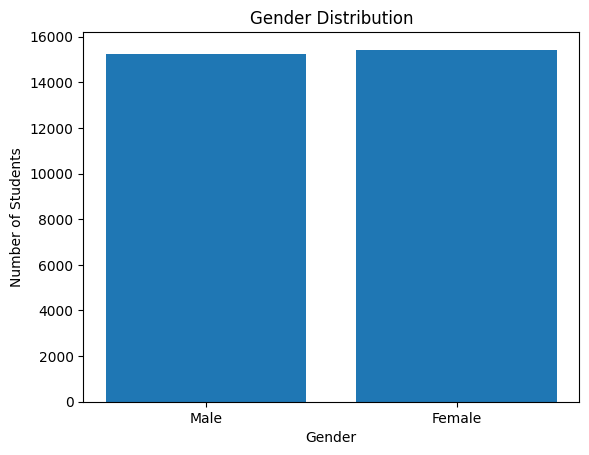

How many male and female students are in the dataset:
Male students: 15217
Female students: 15424
 What percentage of students are male in the dataset:
Male student percentage: 49.6622172905584
What percentage of students are female in the dataset:
Female student percentage: 50.337782709441605
Explore the relationship between ethnicity and test scores:


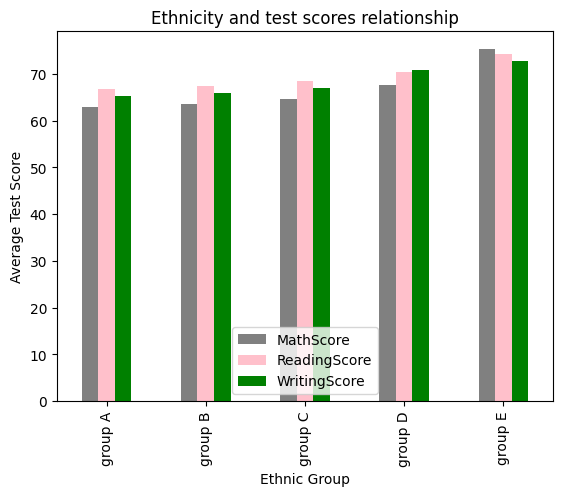

Which ethnic group has the highest average score in math?
group E
Which ethnic group has the highest average score in reading?
group E
Which ethnic group has the highest average score in writing?
group E
Investigate the impact of the test preparation course on test resul


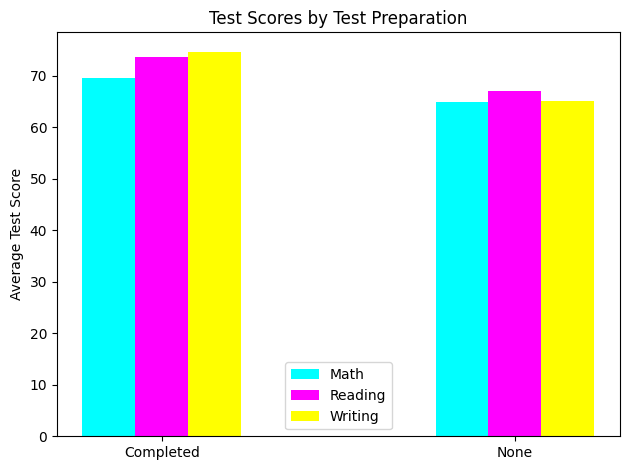

What is the average math score for students who completed the test preparation course?
69.5466599698644
What is the average reading score for students who completed the test preparation course?
73.73299849321948
What is the average writing score for students who completed the test preparation course?
74.70326469111
Analyze the distribution of parents by marital status among students
How many students have married parents?
16844
How many students have single parents?
7097
Explore the connection between sports and test scores


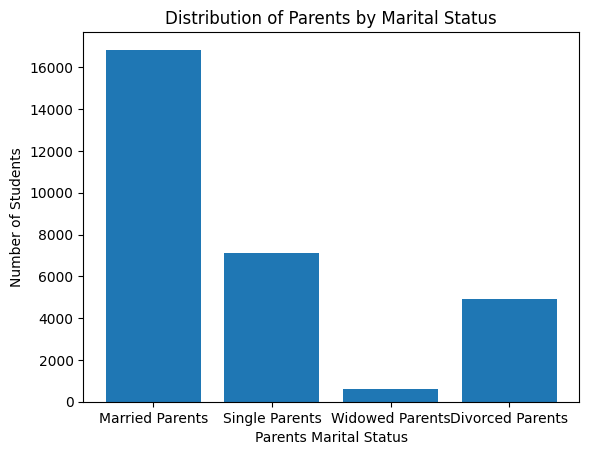

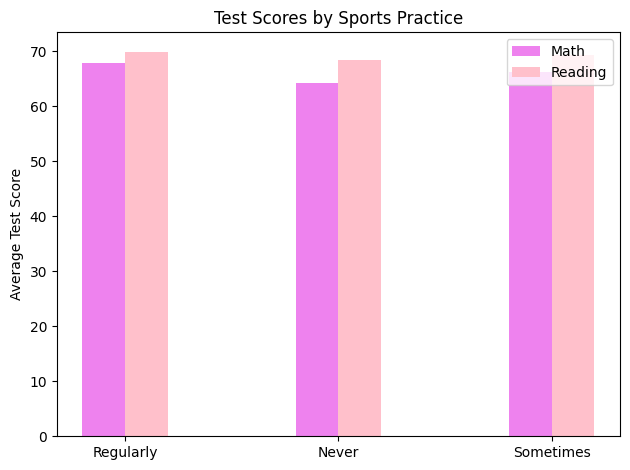

 Do students who regularly participate in sports have higher average math scores than those who never participate in sports?
True
Do students who regularly participate in sports have higher average reading scores than those who never participate in sports?
True
Analyze the distribution of transportation to school among students


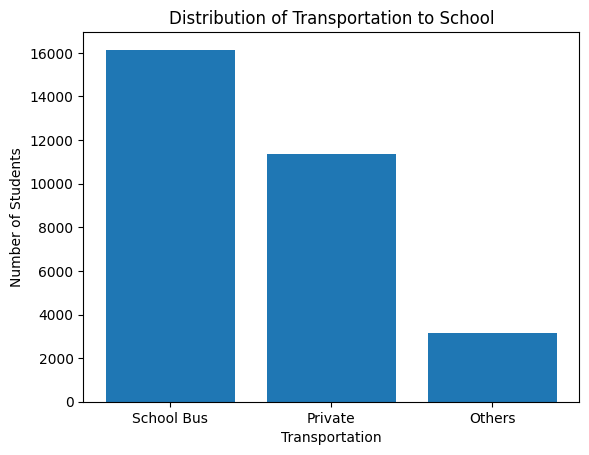

How many students use the school bus to get to school?
16145
How many students use private transportation to get to school?
11362


In [12]:
#Analyze the gender distribution among students
males = df[df["Gender"] == "male"]
females = df[df["Gender"] == "female"]

plt.bar(["Male", "Female"], [len(males), len(females)])
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.title("Gender Distribution")
plt.show()


print('How many male and female students are in the dataset:')
print("Male students:", len(males))
print("Female students:", len(females))

print(" What percentage of students are male in the dataset:")
print("Male student percentage:", len(males) / len(df) * 100)


print("What percentage of students are female in the dataset:")
print("Female student percentage:", len(females) / len(df) * 100)


print("Explore the relationship between ethnicity and test scores:")
ethnic_group_means = df[["EthnicGroup", "MathScore","ReadingScore","WritingScore"]].groupby("EthnicGroup").mean()

ethnic_group_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"], color=['grey', 'pink', 'green'])
plt.xlabel("Ethnic Group")
plt.ylabel("Average Test Score")
plt.title("Ethnicity and test scores relationship")
plt.show()


print("Which ethnic group has the highest average score in math?")
print(df.groupby('EthnicGroup')['MathScore'].mean().idxmax())

print("Which ethnic group has the highest average score in reading?")
print(df.groupby('EthnicGroup')['ReadingScore'].mean().idxmax())

print("Which ethnic group has the highest average score in writing?")
print(df.groupby('EthnicGroup')['WritingScore'].mean().idxmax())

print("Investigate the impact of the test preparation course on test resul")
test_prep_students = df[df["TestPrep"] == "completed"]
no_test_prep_students = df[df["TestPrep"] == "none"]

test_prep_labels = ["Completed", "None"]
math_scores = [test_prep_students["MathScore"].mean(), no_test_prep_students["MathScore"].mean()]
reading_scores = [test_prep_students["ReadingScore"].mean(), no_test_prep_students["ReadingScore"].mean()]
writing_scores = [test_prep_students["WritingScore"].mean(), no_test_prep_students["WritingScore"].mean()]

x = np.arange(len(test_prep_labels))
width = 0.15

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, math_scores, width, label="Math", color='cyan')
rects2 = ax.bar(x, reading_scores, width, label="Reading", color='magenta')
rects3 = ax.bar(x + width, writing_scores, width, label="Writing", color='yellow')

ax.set_ylabel("Average Test Score")
ax.set_title("Test Scores by Test Preparation")
ax.set_xticks(x)
ax.set_xticklabels(test_prep_labels)
ax.legend()

fig.tight_layout()
plt.show()


print("What is the average math score for students who completed the test preparation course?")
print(df[df['TestPrep'] == 'completed']['MathScore'].mean())

print("What is the average reading score for students who completed the test preparation course?")
print(df[df['TestPrep'] == 'completed']['ReadingScore'].mean())

print("What is the average writing score for students who completed the test preparation course?")
print(df[df['TestPrep'] == 'completed']['WritingScore'].mean())


print("Analyze the distribution of parents by marital status among students")
married_parents_students = df[df["ParentMaritalStatus"] == "married"]
single_parents_students = df[df["ParentMaritalStatus"] == "single"]
widowed_parents_students = df[df["ParentMaritalStatus"] == "widowed"]
divorced_parents_students = df[df["ParentMaritalStatus"] == "divorced"]

plt.bar(["Married Parents", "Single Parents", "Widowed Parents", "Divorced Parents"], [len(married_parents_students), len(single_parents_students), len(widowed_parents_students), len(divorced_parents_students)])
plt.xlabel("Parents Marital Status")
plt.ylabel("Number of Students")
plt.title("Distribution of Parents by Marital Status")

print("How many students have married parents?")
print(len(df[df['ParentMaritalStatus'] == 'married']))

print("How many students have single parents?")
print(len(df[df['ParentMaritalStatus'] == 'single']))

print("Explore the connection between sports and test scores")
sports_regularly_students = df[df["PracticeSport"] == "regularly"]
sports_never_students = df[df["PracticeSport"] == "never"]
sports_sometimes_students = df[df["PracticeSport"] == "sometimes"]

sports_labels = ["Regularly", "Never", "Sometimes"]
math_scores = [sports_regularly_students["MathScore"].mean(), 
               sports_never_students["MathScore"].mean(), 
               sports_sometimes_students["MathScore"].mean()]
reading_scores = [sports_regularly_students["ReadingScore"].mean(), 
                  sports_never_students["ReadingScore"].mean(), 
                  sports_sometimes_students["ReadingScore"].mean()]

x = np.arange(len(sports_labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, math_scores, width, label="Math", color='violet')
rects2 = ax.bar(x + width/2, reading_scores, width, label="Reading", color='pink')

ax.set_ylabel("Average Test Score")
ax.set_title("Test Scores by Sports Practice")
ax.set_xticks(x)
ax.set_xticklabels(sports_labels)
ax.legend()

fig.tight_layout()
plt.show()


print(" Do students who regularly participate in sports have higher average math scores than those who never participate in sports?")
avg_math_sports = df.groupby('PracticeSport')['MathScore'].mean()
print(avg_math_sports['regularly'] > avg_math_sports['never'])



print("Do students who regularly participate in sports have higher average reading scores than those who never participate in sports?")
avg_math_sports = df.groupby('PracticeSport')['ReadingScore'].mean()
print(avg_math_sports['regularly'] > avg_math_sports['never'])

print("Analyze the distribution of transportation to school among students")
school_bus_students = df[df["TransportMeans"] == "school_bus"]
private_transport_students = df[df["TransportMeans"] == "private"]
other_transport = df[df["TransportMeans"].isna()]

plt.bar(["School Bus", "Private", "Others"], [len(school_bus_students), len(private_transport_students), len(other_transport)])
plt.xlabel("Transportation")
plt.ylabel("Number of Students")
plt.title("Distribution of Transportation to School")
plt.show()


print("How many students use the school bus to get to school?")
print(len(df[df['TransportMeans'] == 'school_bus']))

print("How many students use private transportation to get to school?")
print(len(df[df['TransportMeans'] == 'private']))



classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

df = df.dropna()
data = df[["Gender", "EthnicGroup", "ParentEduc", "LunchType", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", 
              "NrSiblings", "TransportMeans", "WklyStudyHours", "MathScore", "ReadingScore", "WritingScore"]]

target_numbers = {'none': 0, 'completed': 1}

target = df["TestPrep"].map(target_numbers)

pipe_cat = Pipeline([('OHE', OneHotEncoder(drop='first', handle_unknown='ignore'))])
pipe_num = Pipeline([('scale', StandardScaler())])

categorical_vars = data.select_dtypes('object').columns.tolist()
numerical_vars = data.select_dtypes('number').columns.tolist()

full_pipeline = Pipeline([
        ('preprocess', ColumnTransformer(transformers=[
        ('numbers', pipe_num, numerical_vars),
        ('categories', pipe_cat, categorical_vars) 
    ]))
])

data_prepared = full_pipeline.fit_transform(data)


X_train, X_test, y_train, y_test = train_test_split(data_prepared, target, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

y_knn_pred = knn_clf.predict(X_test)


accuracy_score(y_test, y_knn_pred)

D:\University\Fourth-course\mic\Exam\Exam\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\University\Fourth-course\mic\Exam\Exam\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Python\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Python\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Python\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(execut

0.6258768511301637